In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_theme(style='whitegrid')
palette = sns.color_palette("Set2")

In [4]:
df = pd.read_csv('credit_risk_dataset.csv')

In [5]:
train_df = df

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
train_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
# Lets do Analysis of categorical and numerical variables
categorical_features = train_df.select_dtypes(include=['object']).columns
numerical_features = train_df.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
Numeric Variables: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [9]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(train_df[col].value_counts())


Distribution of categorical variable person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Distribution of categorical variable loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Distribution of categorical variable loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Distribution of categorical variable cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


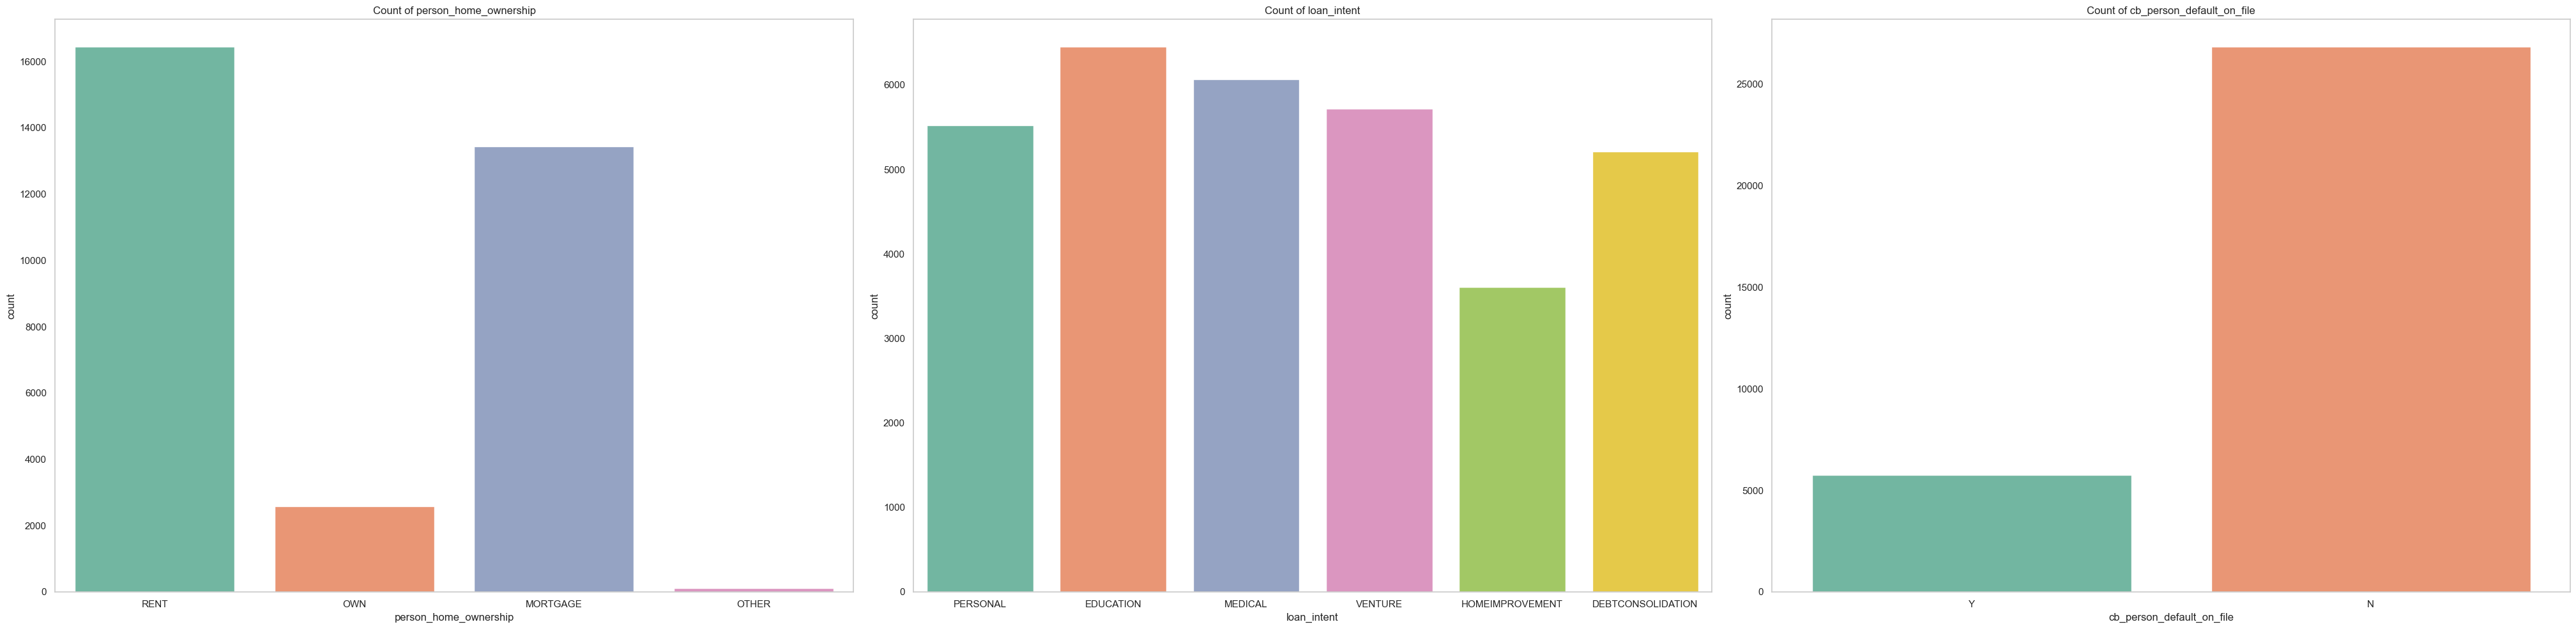

In [10]:
# Counting categorical variables
plt.figure(figsize=(40.5, 10))
categorical_cols = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=train_df[col],palette=palette)
    plt.title(f'Count of {col}')
    plt.grid(False)
    plt.tight_layout()
plt.show()

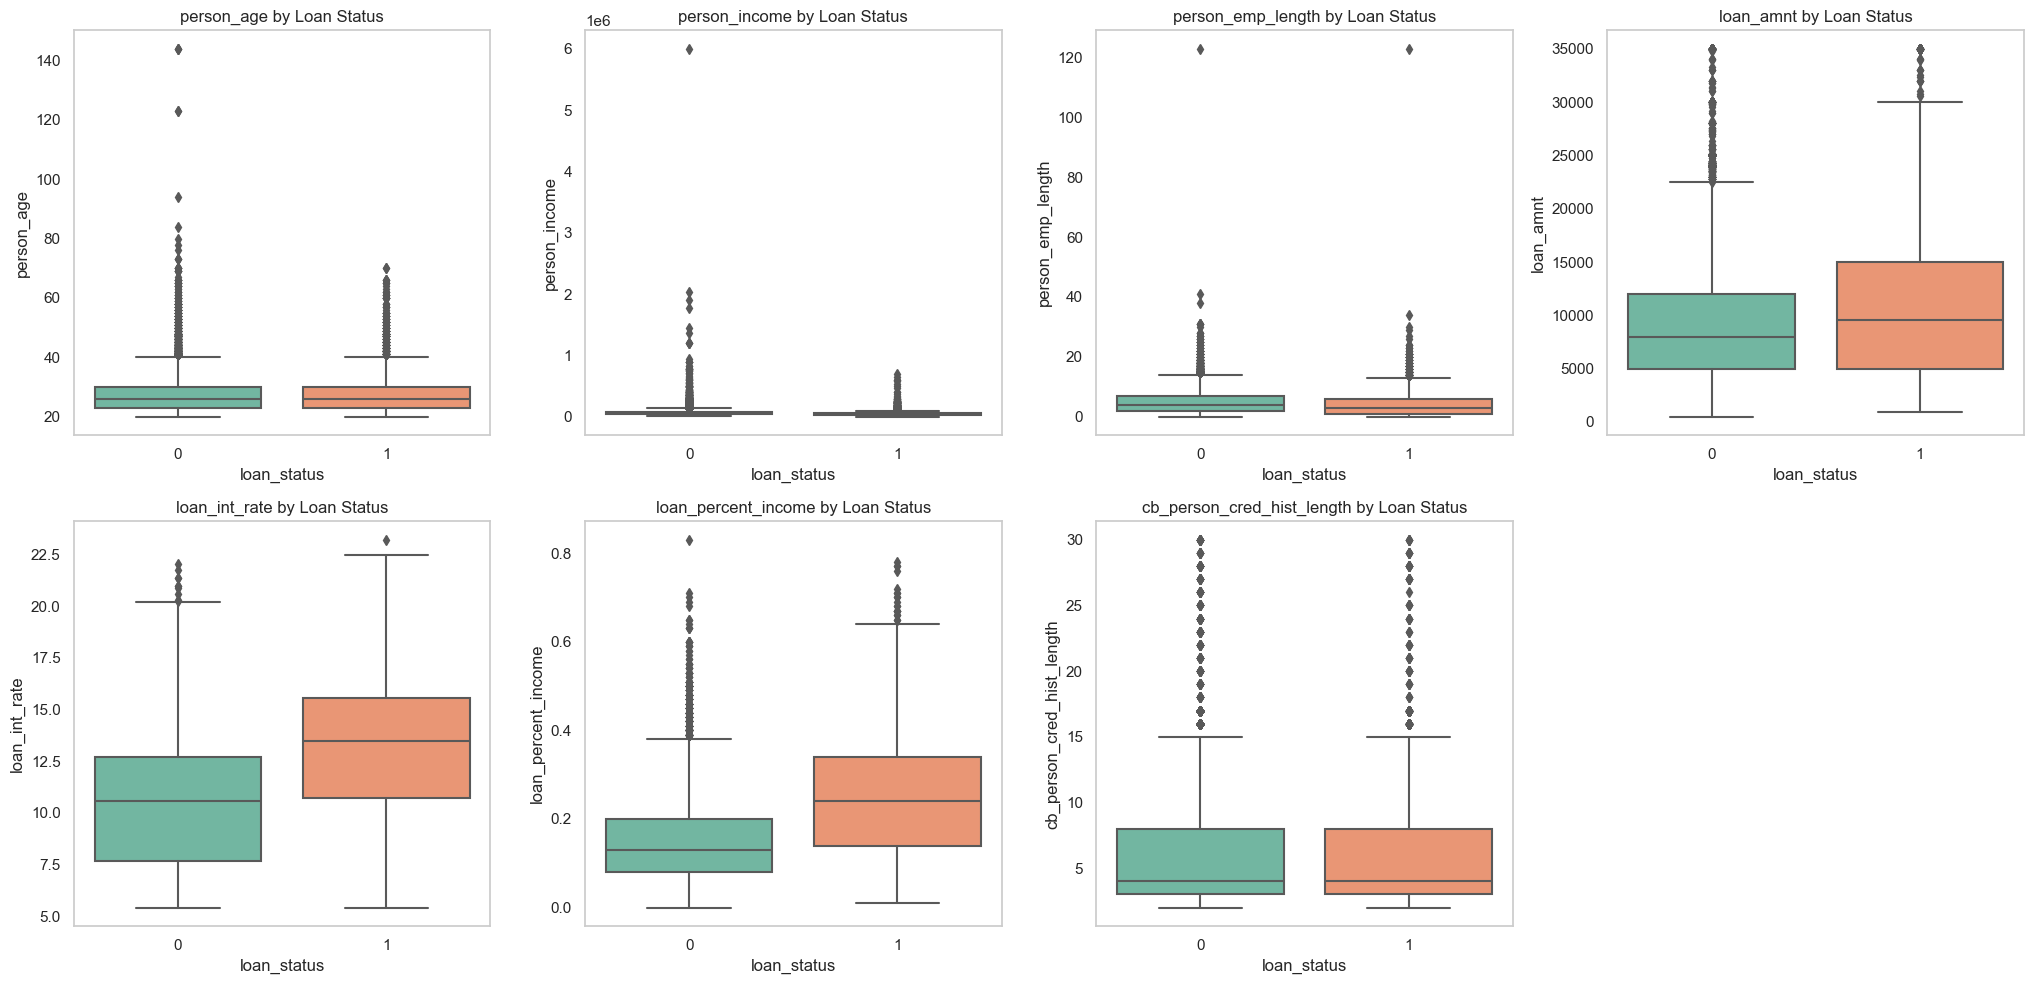

In [11]:
# Comparison of distributions
numerical_cols = ['person_age', 'person_income','person_emp_length', 'loan_amnt',
                  'loan_int_rate', 'loan_percent_income',
                  'cb_person_cred_hist_length']

# Boxplots chart
print()
print()
plt.figure(figsize=(20.5, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='loan_status', y=col, data=train_df,palette=palette)
    plt.title(f'{col} by Loan Status')
    plt.grid(False)
plt.tight_layout()
plt.show()


Distribution of target variable 'Target':
loan_status
0    25473
1     7108
Name: count, dtype: int64


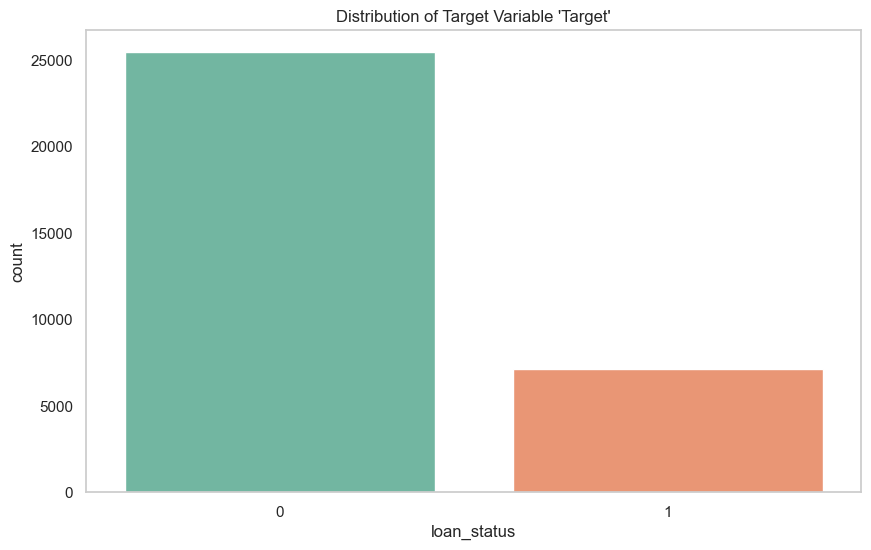

In [12]:
# Analysis of target variable 'Target'
print("\nDistribution of target variable 'Target':")
print(train_df['loan_status'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='loan_status', palette=palette)
plt.title("Distribution of Target Variable 'Target'")
plt.grid(False)
plt.show()

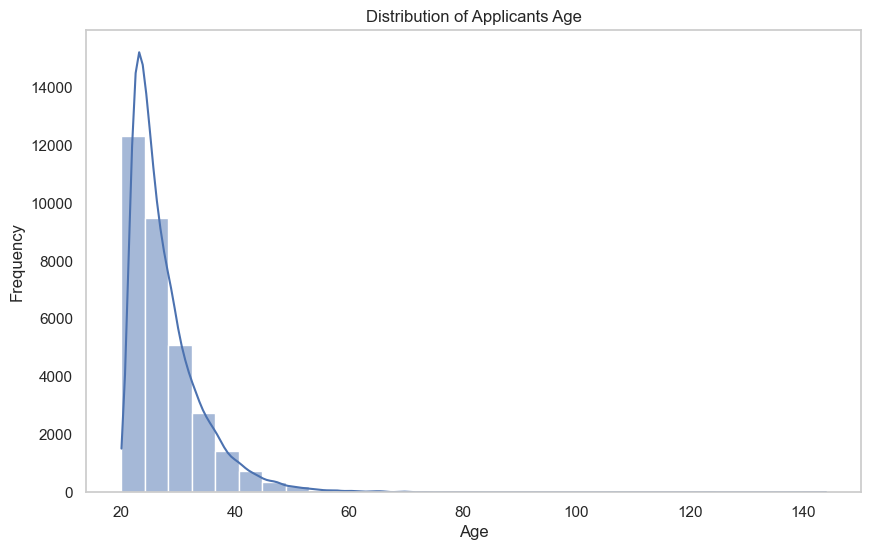

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='person_age', bins=30, kde=True, palette='Set2')
plt.title('Distribution of Applicants Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

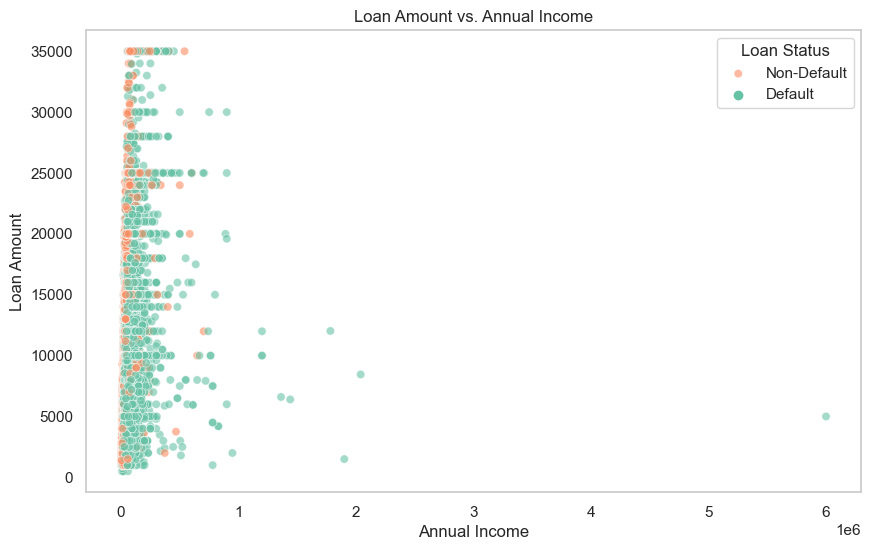

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6, palette='Set2')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

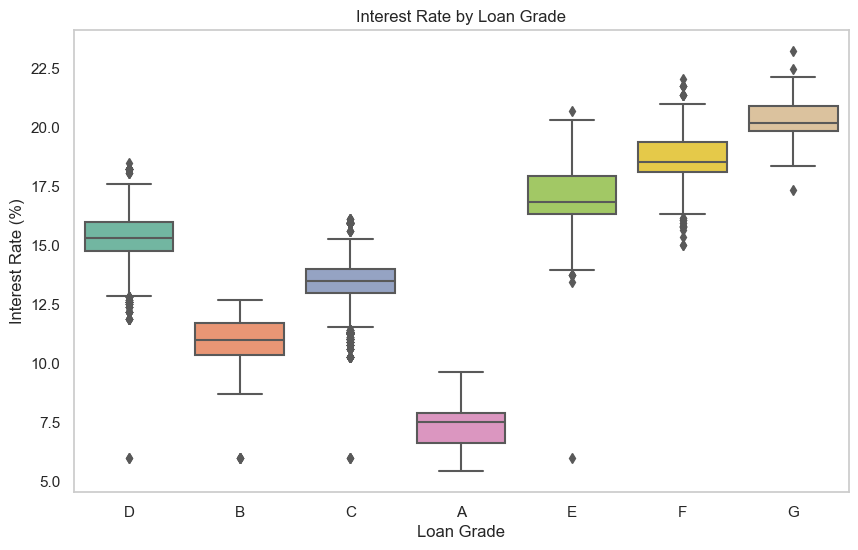

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='loan_grade', y='loan_int_rate', palette='Set2')
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.grid(False)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

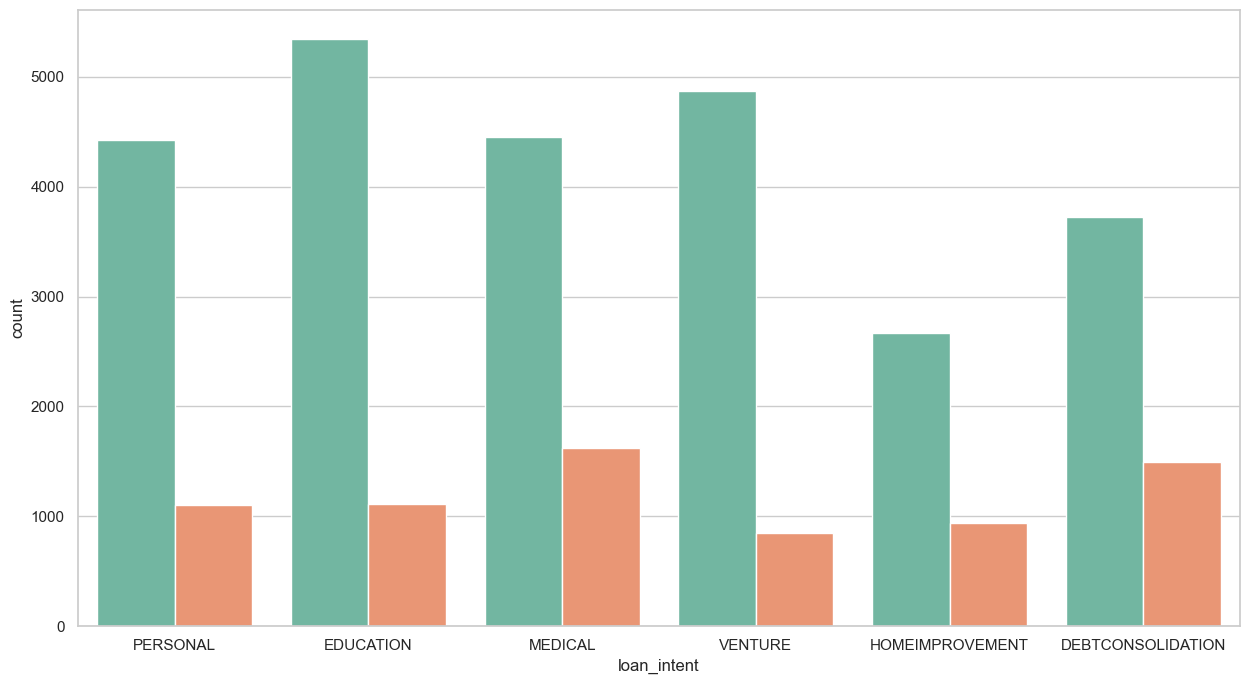

In [16]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train_df, x='loan_intent', hue='loan_status', palette='Set2')
plt.title('Proportion of Defaulters by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
numeric_data = train_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# cb_person_cred_hist_length vs. person_age
sns.scatterplot(x="cb_person_cred_hist_length", y="person_age", data=train_df, hue="loan_status", palette='Set2')
plt.title('cb_person_cred_hist_length vs. person_age')
plt.grid(False)


In [ ]:
# Chart 2
sns.scatterplot(x="loan_percent_income", y="loan_amnt", data=train_df, hue="loan_status", palette='Set2')
plt.title('loan_percent_income vs. loan_amnt')
plt.grid(False)

In [ ]:
# Chart 3
sns.scatterplot(x="loan_amnt", y="loan_percent_income", data=train_df, hue="loan_status", palette='Set2')
plt.title('loan_amnt vs. loan_percent_income')
plt.grid(False)

In [ ]:
# Chart 4
sns.scatterplot(x="person_age", y="cb_person_cred_hist_length", data=train_df, hue="loan_status", palette='Set2')
plt.title('person_age vs. cb_person_cred_hist_length')
plt.grid(False)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x='loan_status', y='person_emp_length', palette='Set2')

# Adding text with mean values
non_default_emp_length = train_df[train_df['loan_status'] == 0]['person_emp_length'].mean()
default_emp_length = train_df[train_df['loan_status'] == 1]['person_emp_length'].mean()
plt.text(0, non_default_emp_length, f'Non-Default Mean: {non_default_emp_length:.2f}', fontsize=10, color='blue')
plt.text(1, default_emp_length, f'Default Mean: {default_emp_length:.2f}', fontsize=10, color='orange')

plt.title('Employment Length vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (years)')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(10.5, 8))
grade_status_counts = train_df.groupby(['loan_grade', 'loan_status']).size().unstack()
grade_status_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Loan Grade Distribution by Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_df, x='loan_intent', y='person_income', hue='loan_status', palette='Set2')
plt.title('Income Distribution by Loan Intent, Colored by Loan Status')
plt.xlabel('Loan Intent')
plt.ylabel('Income')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Default', 'Default'])
plt.grid(False)
plt.show()

In [ ]:
plt.figure(figsize=(20.5, 10)) 
sns.barplot(data=train_df, x='loan_status', y='loan_amnt', hue='loan_intent', errorbar=None, palette='Set2')
plt.title('Loan Amount Distribution by Loan Status and Intent')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.legend(title='Loan Intent', loc='upper right')
plt.grid(False)
plt.show()

In [ ]:
# Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

In [ ]:
# View missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

In [ ]:
# If there are missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables

median_values = train_df['person_emp_length'].median()
train_df['person_emp_length'].fillna(median_values, inplace=True)
median_values1 = train_df['loan_int_rate'].median()
train_df['loan_int_rate'].fillna(median_values1, inplace=True)

In [ ]:
# Remove duplicate lines if any
train_df.drop_duplicates(inplace=True)

In [ ]:
# Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

In [ ]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables
label_encoder = LabelEncoder()

train_df['person_home_ownership'] = label_encoder.fit_transform(train_df['person_home_ownership'])
train_df['loan_intent'] = label_encoder.fit_transform(train_df['loan_intent'])
train_df['cb_person_default_on_file'] = label_encoder.fit_transform(train_df['cb_person_default_on_file'])
train_df['loan_grade'] = label_encoder.fit_transform(train_df['loan_grade'])

# Viewing
label_encoder

In [ ]:
# Viewing 
train_df.head()

In [ ]:
# Resources
X = train_df.drop(columns=['loan_status'])

# Target variable
y = train_df['loan_status']

In [ ]:
# Visualizing data x
X.shape

In [ ]:
# Viewing y data
y.shape

In [ ]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

In [ ]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [ ]:
# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [
    
    # Naive Bayes Model
    GaussianNB(),
    
    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),
    
    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),
    
    # Logistic regression model
    LogisticRegression(random_state=50),
    
    # Ada Boost Model
    AdaBoostClassifier(random_state=45),
    
    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(random_state=42),
    
    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(num_leaves=31,
                   boosting_type='gbdt',
                   bagging_fraction= 0.9,
                   learning_rate=0.05,
                   feature_fraction=0.9,
                   bagging_freq=50,
                   verbose=50),
    
    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=best_k),
]

In [ ]:
# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

In [ ]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

# Creating decision tree model
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Model training
model_dtc_fit = model_dtc.fit(X_train, y_train)

#plot tree
# importing library to plot trees
from sklearn import tree
fig, ax = plt.subplots(figsize=(40, 20), facecolor = "w")
tree.plot_tree(model_dtc,
               ax = ax,
               fontsize = 20,
               rounded = True,
               filled = True,
               class_names = ["Risk Yes", "Risk No"])
plt.show()

In [ ]:
# accuracy_score and y_train y_test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

In [ ]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

In [ ]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42))]

# Iterate over models
for model_name, model in models_with_feature_importances:
    
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 
                                           'Importance': feature_importances})
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10],palette=palette)
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

In [ ]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Risk Yes", "Risk No"], 
                yticklabels=["Risk Yes", "Risk No"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

In [ ]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)
    
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    
    print("------------------")

In [ ]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()
    
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()
    
    print("=======================================")

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('credit_risk_dataset.csv')

In [ ]:
# If there are missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables

median_values = train_df['person_emp_length'].median()
train_df['person_emp_length'].fillna(median_values, inplace=True)
median_values1 = train_df['loan_int_rate'].median()
train_df['loan_int_rate'].fillna(median_values1, inplace=True)

In [ ]:
# Handling Missing Values
print("Number of missing values ​​per column:")
print(train_df.isnull().sum())

In [ ]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables
label_encoder = LabelEncoder()

train_df['person_home_ownership'] = label_encoder.fit_transform(train_df['person_home_ownership'])
train_df['loan_intent'] = label_encoder.fit_transform(train_df['loan_intent'])
train_df['cb_person_default_on_file'] = label_encoder.fit_transform(train_df['cb_person_default_on_file'])
train_df['loan_grade'] = label_encoder.fit_transform(train_df['loan_grade'])

# Viewing
label_encoder

In [ ]:
# Separate the resources (X) and the target column (y)
X = train_df.drop('loan_status', axis=1)
y = train_df['loan_status']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Viewing X_train rows and columns", X_train.shape)

# Viewing rows and columns
print("Viewing rows and columns y_train", y_train.shape)

In [ ]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Viewing
scaler

In [ ]:
# Build Feedforward Neural Network (FNN)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

In [ ]:
# Function to plot training and validation graphs
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Season')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')
    plt.grid(False)

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Season')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss of training and validation')
    plt.grid(False)
    plt.show()

# Plot the graphs
plot_history(history)

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

In [ ]:
# Make predictions
predictions_ANN = model.predict(X_test)
predictions_ANN = (predictions_ANN > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_ANN)
print(f'Accuracy Neural network: {accuracy}')

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_ANN)

# Display the confusion matrix using seaborn with labels 'Benign' and 'Malignant'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Risk Yes", "Risk No"], 
            yticklabels=["Risk Yes", "Risk No"])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Confusion Matrix and Classification Report
print(classification_report(y_test, predictions_ANN))

In [ ]:
# Avaliar o modelo
nn_predictions_train = (model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {"Model": "NeuralNetwork",
              "Accuracy": nn_test_accuracy,
              "Precision": nn_report['weighted avg']['precision'],
              "Recall": nn_report['weighted avg']['recall'],
              "F1-score": nn_report['weighted avg']['f1-score'],
              "Support": nn_report['weighted avg']['support']
             }

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()
         ]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled